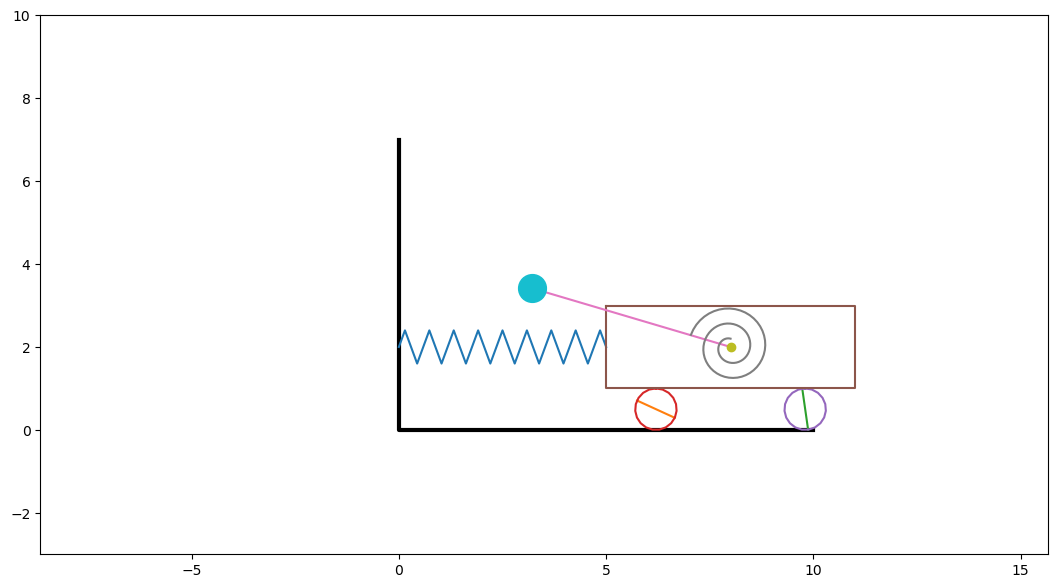

In [2]:
# в этом окне статический рисунок коробки
# в следующем - в движении


# иморт библиотек
import numpy as np # библиотека для работы с массивами чисел
import matplotlib.pyplot as plt # библиотека для рисования


# описываем закон движения тела
# (пока что рандомный, только для примера)
Steps = 1001 # количество кадров для прорисовки
t = np.linspace(0, 10, Steps)   # создаём сетку по времени
x = np.cos(2*t) + 3*np.sin(3.8*t)  # создаем список координат X (для движения коробки по оси Х)
phi = 2*np.sin(4.7*t) + 5*np.cos(7*t)  # список углов намота пружины


# описываем параметры тела
# некоторые параметры косметические (нужны только для красоты рисунка)
# некоторые важны для закона движения
SprX_0 = 4   # начальная длина сжатой пружины
BoxX = 6     # длина коробки
BoxY = 2     # высота коробки
WheelR = 0.5 # радиус колес
l = 5        # длина палки маятника

# вычисляем массивы значений для прорисовки тела
# координаты центра коробки
X_A = SprX_0 + BoxX/2 + x   
Y_A = 2*WheelR + BoxY/2
# координаты маятника
X_B = X_A + l * np.sin(phi)   # центр коробки + повернутая на нужный угол палка
Y_B = Y_A + l * np.cos(phi)
# массивы вершин коробки
X_Box = np.array([-BoxX/2, BoxX/2, BoxX/2, -BoxX/2, -BoxX/2])  
Y_Box = np.array([BoxY/2, BoxY/2, -BoxY/2, -BoxY/2, BoxY/2])   
# массивы окружности для колёс
psi = np.linspace(0, 6.28, 20)  # от 0 до 2 пи (6.28 = 2*пи)  
X_Wheel = WheelR * np.sin(psi)
Y_Wheel = WheelR * np.cos(psi)
# угол поворота колёс
alpha = x / WheelR   
# координаты центров колёс
X_C1 = SprX_0 + BoxX / 5 + x    
Y_C1 = WheelR
X_C2 = SprX_0 + 4 * BoxX / 5 + x
Y_C2 = WheelR
# Для визуализации движения колеса нарисуем на них диаметры
X_D1 = np.array([X_C1 + WheelR * np.sin(alpha), X_C1 - WheelR * np.sin(alpha)]) 
Y_D1 = np.array([Y_C1 + WheelR * np.cos(alpha), Y_C1 - WheelR * np.cos(alpha)]) 
# координаты стенки и земли
X_Ground = [0, 0, 10]
Y_Ground = [7, 0, 0]

# описание пружины
K = 19                # количество изломов пружины
Sh = 0.4              # ширина пружины
b = 1/(K-2)           # длина одного излома
# массивы вершин ломаной пружинки
X_Spr = np.zeros(K)   # сначала создаем списки из нулей, ниже их заполняем
Y_Spr = np.zeros(K)
X_Spr[0] = 0    # начальный край пружины находится в точке 0
Y_Spr[0] = 0
X_Spr[K-1] = 1     # конечный край пружины находится в точке 1   
Y_Spr[K-1] = 0       
for i in range(K-2): # остальные изломы пружины
    # первый и последний излом имеют длину b/2 (они на половину короче остальных)
    X_Spr[i+1] = b*(i+1) - b/2
    Y_Spr[i+1] = Sh*(-1)**i # (-1)**i решает, вверх или вниз направлен текущий излом
# текущая длина пружины
L_Spr = SprX_0 + x # начальная длина пружины + сдвиг по оси Х

# шаблон спиральной пружины
Nv = 3     # количество витков пружины  
R1 = 0.2   # внутренний радиус пружины  
R2 = 1     # внешний радиус пружины  
thetta = np.linspace(0, Nv*6.28 - phi[0], 100) # массив углов, на которые повернут конец спирали
X_SpiralSpr = -(R1 + thetta*(R2-R1) / thetta[-1]) * np.sin(thetta)
Y_SpiralSpr = (R1 + thetta*(R2-R1) / thetta[-1]) * np.cos(thetta)


# рисование
fig = plt.figure(figsize=[13,7])    # создаём большое красивое окно
ax = fig.add_subplot(1,1,1)         # создаём место для рисования
ax.axis('equal')                    # равный масштаб осей
ax.set(xlim=[-3,10], ylim=[-3,10])  # пределы по осям

# рисуем землю и стену
ax.plot(X_Ground,Y_Ground,color='black',linewidth=3)  
# рисуем пружину
Drawn_Spring = ax.plot(X_Spr*L_Spr[0], Y_A+Y_Spr)[0]  
# рисуем диаметры колёс
Drawn_WheelD1 = ax.plot([X_C1[0]+WheelR*np.sin(alpha[0]),X_C1[0]-WheelR*np.sin(alpha[0])],
                         [Y_C1+WheelR*np.cos(alpha[0]), Y_C1-WheelR*np.cos(alpha[0])])[0]
# к альфе прибавили 1, чтобы радиусы крутились не параллельно                         
Drawn_WheelD2 = ax.plot([X_C2[0]+WheelR*np.sin(alpha[0]+1),X_C2[0]-WheelR*np.sin(alpha[0]+1)],
                         [Y_C2+WheelR*np.cos(alpha[0]+1), Y_C2-WheelR*np.cos(alpha[0]+1)])[0]
                         
# рисуем колёса
Drawn_Wheel1 = ax.plot(X_C1[0]+X_Wheel, Y_C1+Y_Wheel)[0]  
Drawn_Wheel2 = ax.plot(X_C2[0]+X_Wheel, Y_C2+Y_Wheel)[0]
# рисуем коробку
Drawn_Box = ax.plot(X_A[0]+X_Box, Y_A+Y_Box)[0]  
# рисуем палку маятника
Line_AB = ax.plot([X_A[0],X_B[0]], [Y_A,Y_B[0]])[0]     
# спиральная пружина
Drawn_SpiralSpring = ax.plot(X_SpiralSpr+X_A[0], Y_SpiralSpr+Y_A)[0]  
# точки А и Б
Point_A = ax.plot(X_A[0], Y_A,marker='o')[0]                  
Point_B = ax.plot(X_B[0], Y_B[0],marker='o',markersize=20)[0]

plt.show()

<IPython.core.display.Javascript object>


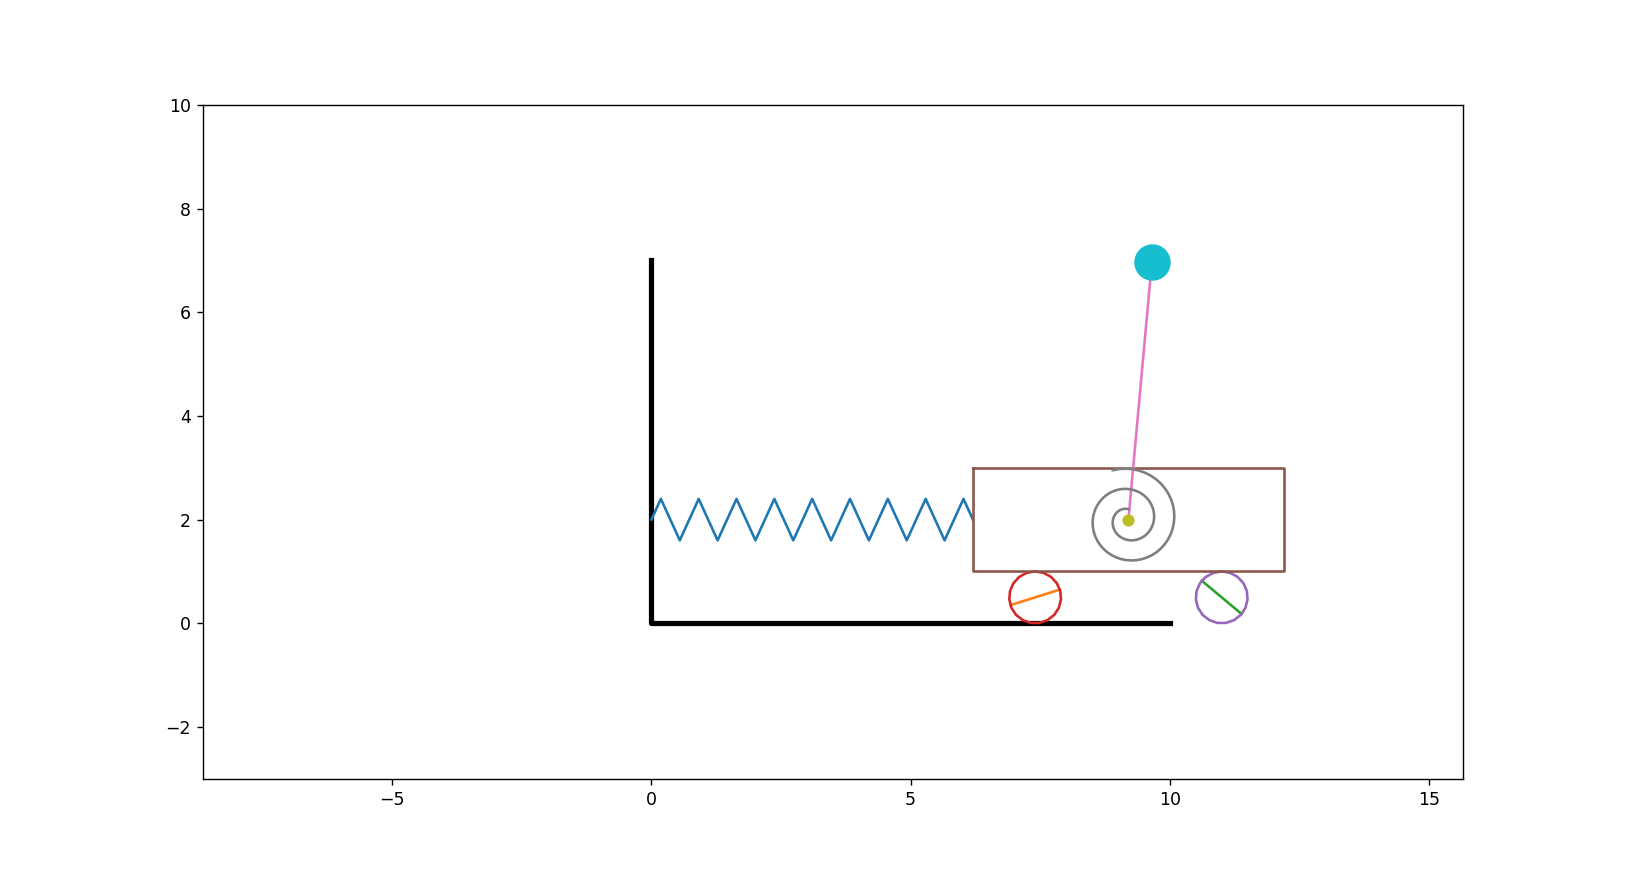

In [3]:
# мантра для анимации
%matplotlib notebook

import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation # библтотека для анимации движения

Steps = 1001 
t = np.linspace(0, 10, Steps)   
x = np.cos(2*t) + 3*np.sin(3.8*t)  
phi = 2*np.sin(4.7*t) + 5*np.cos(7*t)  

SprX_0 = 4   
BoxX = 6     
BoxY = 2     
WheelR = 0.5 
l = 5        

X_A = SprX_0 + BoxX/2 + x   
Y_A = 2*WheelR + BoxY/2
X_B = X_A + l * np.sin(phi)   
Y_B = Y_A + l * np.cos(phi)
X_Box = np.array([-BoxX/2, BoxX/2, BoxX/2, -BoxX/2, -BoxX/2])  
Y_Box = np.array([BoxY/2, BoxY/2, -BoxY/2, -BoxY/2, BoxY/2])   
psi = np.linspace(0, 6.28, 20)  
X_Wheel = WheelR * np.sin(psi)
Y_Wheel = WheelR * np.cos(psi)
alpha = x / WheelR   
X_C1 = SprX_0 + BoxX / 5 + x    
Y_C1 = WheelR
X_C2 = SprX_0 + 4 * BoxX / 5 + x
Y_C2 = WheelR
X_D1 = np.array([X_C1 + WheelR * np.sin(alpha), X_C1 - WheelR * np.sin(alpha)]) 
Y_D1 = np.array([Y_C1 + WheelR * np.cos(alpha), Y_C1 - WheelR * np.cos(alpha)]) 
X_Ground = [0, 0, 10]
Y_Ground = [7, 0, 0]

K = 19                
Sh = 0.4              
b = 1/(K-2)           
X_Spr = np.zeros(K)   
Y_Spr = np.zeros(K)
X_Spr[0] = 0    
Y_Spr[0] = 0
X_Spr[K-1] = 1       
Y_Spr[K-1] = 0       
for i in range(K-2):
    X_Spr[i+1] = b*(i+1) - b/2
    Y_Spr[i+1] = Sh*(-1)**i 
L_Spr = SprX_0 + x 

Nv = 3       
R1 = 0.2   
R2 = 1     
thetta = np.linspace(0, Nv*6.28 - phi[0], 100)
X_SpiralSpr = -(R1 + thetta*(R2-R1) / thetta[-1]) * np.sin(thetta)
Y_SpiralSpr = (R1 + thetta*(R2-R1) / thetta[-1]) * np.cos(thetta)

fig = plt.figure(figsize=[13,7])    
ax = fig.add_subplot(1,1,1)         
ax.axis('equal')                    
ax.set(xlim=[-3,10], ylim=[-3,10])  

ax.plot(X_Ground,Y_Ground,color='black',linewidth=3)  
Drawn_Spring = ax.plot(X_Spr*L_Spr[0], Y_A+Y_Spr)[0]  
Drawn_WheelD1 = ax.plot([X_C1[0]+WheelR*np.sin(alpha[0]),X_C1[0]-WheelR*np.sin(alpha[0])],
                         [Y_C1+WheelR*np.cos(alpha[0]), Y_C1-WheelR*np.cos(alpha[0])])[0]                        
Drawn_WheelD2 = ax.plot([X_C2[0]+WheelR*np.sin(alpha[0]+1),X_C2[0]-WheelR*np.sin(alpha[0]+1)],
                         [Y_C2+WheelR*np.cos(alpha[0]+1), Y_C2-WheelR*np.cos(alpha[0]+1)])[0]
                         
Drawn_Wheel1 = ax.plot(X_C1[0]+X_Wheel, Y_C1+Y_Wheel)[0]  
Drawn_Wheel2 = ax.plot(X_C2[0]+X_Wheel, Y_C2+Y_Wheel)[0]
Drawn_Box = ax.plot(X_A[0]+X_Box, Y_A+Y_Box)[0]  
Line_AB = ax.plot([X_A[0],X_B[0]], [Y_A,Y_B[0]])[0]     
Drawn_SpiralSpring = ax.plot(X_SpiralSpr+X_A[0], Y_SpiralSpr+Y_A)[0]  
Point_A = ax.plot(X_A[0], Y_A,marker='o')[0]                  
Point_B = ax.plot(X_B[0], Y_B[0],marker='o',markersize=20)[0]

# добавляем функцию для анимации точки
# в ней происходит пересчет всех параметров, которые должны меняться с каждым кадром
def Kino(i):
    # при движении тела меняются координаты всех элементов тела (коробка, пружина, маятник)
    Point_A.set_data(X_A[i], Y_A)
    Point_B.set_data(X_B[i], Y_B[i])
    Line_AB.set_data([X_A[i], X_B[i]], [Y_A,Y_B[i]])
    Drawn_Box.set_data(X_A[i] + X_Box, Y_A + Y_Box)
    Drawn_Wheel1.set_data(X_C1[i] + X_Wheel, Y_C1 + Y_Wheel)
    Drawn_Wheel2.set_data(X_C2[i] + X_Wheel, Y_C2 + Y_Wheel)
    Drawn_Spring.set_data(X_Spr * L_Spr[i], Y_A + Y_Spr)
    Drawn_WheelD1.set_data([X_C1[i]+WheelR*np.sin(alpha[i]), X_C1[i]-WheelR*np.sin(alpha[i])],
                            [Y_C1+WheelR*np.cos(alpha[i]), Y_C1-WheelR*np.cos(alpha[i])])
    Drawn_WheelD2.set_data([X_C2[i] + WheelR * np.sin(alpha[i]+1), X_C2[i] - WheelR * np.sin(alpha[i]+1)],
                            [Y_C2 + WheelR * np.cos(alpha[i]+1), Y_C2 - WheelR * np.cos(alpha[i]+1)])
    thetta = np.linspace(0, Nv * 6.28 - phi[i], 100)
    X_SpiralSpr = -(R1 + thetta * (R2 - R1) / thetta[-1]) * np.sin(thetta)
    Y_SpiralSpr = (R1 + thetta * (R2 - R1) / thetta[-1]) * np.cos(thetta)
    Drawn_SpiralSpring.set_data(X_SpiralSpr+X_A[i], Y_SpiralSpr+Y_A)
    # функция возвращает массимы пересчитанных значений
    return [Point_A, Point_B, Line_AB, Drawn_Box, Drawn_Wheel1, Drawn_Wheel2,
            Drawn_Spring, Drawn_SpiralSpring, Drawn_WheelD1, Drawn_WheelD2]


# вызов функции для анимации тела
# передаваемые параметры:
# fig - график, на котором будет происходить перерисовка каждого кадра
# Kino - функция, пересчитывающая необходимые значения для каждого кадра
# frames - отсчетные моменты времени
# interval - задержка между кадрами
anima = FuncAnimation(fig, Kino, frames=Steps, interval=10)   

plt.show()

<IPython.core.display.Javascript object>


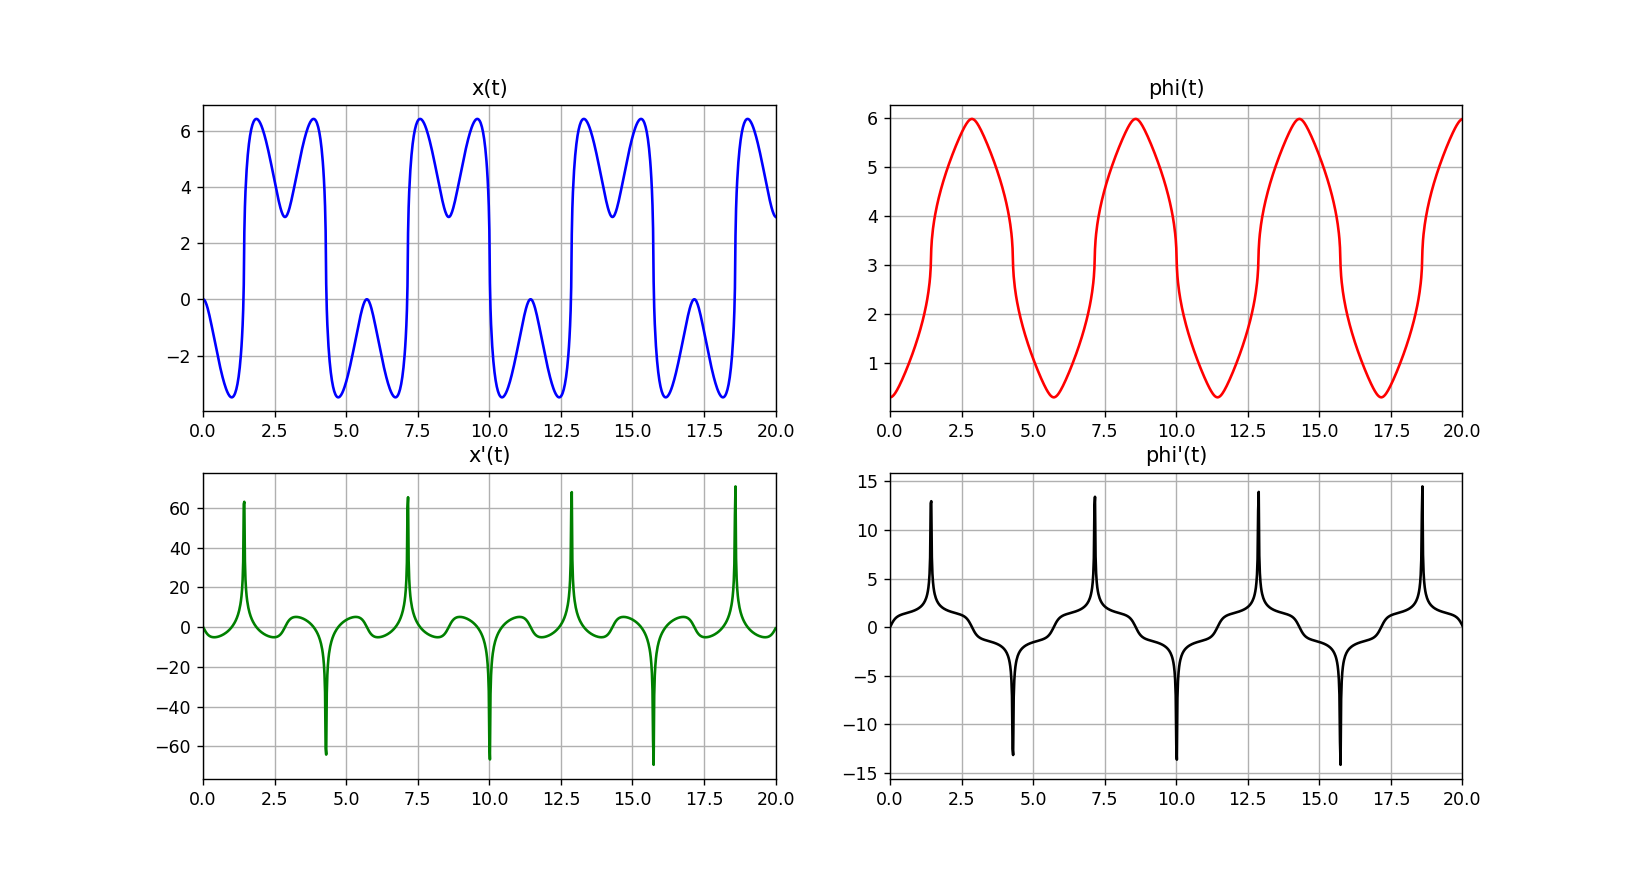

In [4]:
# библиотека для решения систем ДУ
from scipy.integrate import odeint

# функция системы уравнений
def odesys(y, t, M, m, c, k, l, F0, Omega, a, g):  
    dy = np.zeros(4)
    dy[0] = y[2]
    dy[1] = y[3]
    a11 = M + m
    a12 = m*l*np.cos(y[1])
    a21 = m*l*np.cos(y[1])
    a22 = m*l**2
    b1 = F0*np.sin(Omega*t) - k*y[0] + m*l*y[3]**2*np.sin(y[1])
    b2 = - a*y[3] + m*g*l*np.sin(y[1]) - c*y[1]
    dy[2] = (b1*a22 - b2*a12)/(a11*a22 - a12*a21)
    dy[3] = (b2*a11 - b1*a21)/(a11*a22 - a12*a21)
    return dy

# задаём все параметры (заданные величины из учебника)
M = 1     
m = 100
c = 0
k = 0
l = 5
F0 = 0
Omega = 0.5
a = 0
g = 9.81
t_fin = 20

t=np.linspace(0,t_fin,1001) # создаём сетку по времени

x0 = 0      # задаём начальное состояние
phi0 = 0.3
dx0 = 0
dphi0 = 0
y0 = [x0, phi0, dx0, dphi0]  # вектор начального состояния

Y = odeint(odesys, y0, t, (M, m, c, k, l, F0, Omega, a, g))

x = Y[:, 0]   # получили решение
phi = Y[:, 1]
dx = Y[:, 2]
dphi = Y[:, 3]

fig_for_graphs = plt.figure(figsize=[13,7])  # построим их графики
ax_for_graphs = fig_for_graphs.add_subplot(2,2,1)
ax_for_graphs.plot(t,x,color='blue')
ax_for_graphs.set_title("x(t)")
ax_for_graphs.set(xlim=[0,t_fin])
ax_for_graphs.grid(True)

ax_for_graphs = fig_for_graphs.add_subplot(2,2,2)
ax_for_graphs.plot(t,phi,color='red')
ax_for_graphs.set_title('phi(t)')
ax_for_graphs.set(xlim=[0,t_fin])
ax_for_graphs.grid(True)

ax_for_graphs = fig_for_graphs.add_subplot(2,2,3)
ax_for_graphs.plot(t,dx,color='green')
ax_for_graphs.set_title("x'(t)")
ax_for_graphs.set(xlim=[0,t_fin])
ax_for_graphs.grid(True)

ax_for_graphs = fig_for_graphs.add_subplot(2,2,4)
ax_for_graphs.plot(t,dphi,color='black')
ax_for_graphs.set_title('phi\'(t)')
ax_for_graphs.set(xlim=[0,t_fin])
ax_for_graphs.grid(True)

<IPython.core.display.Javascript object>


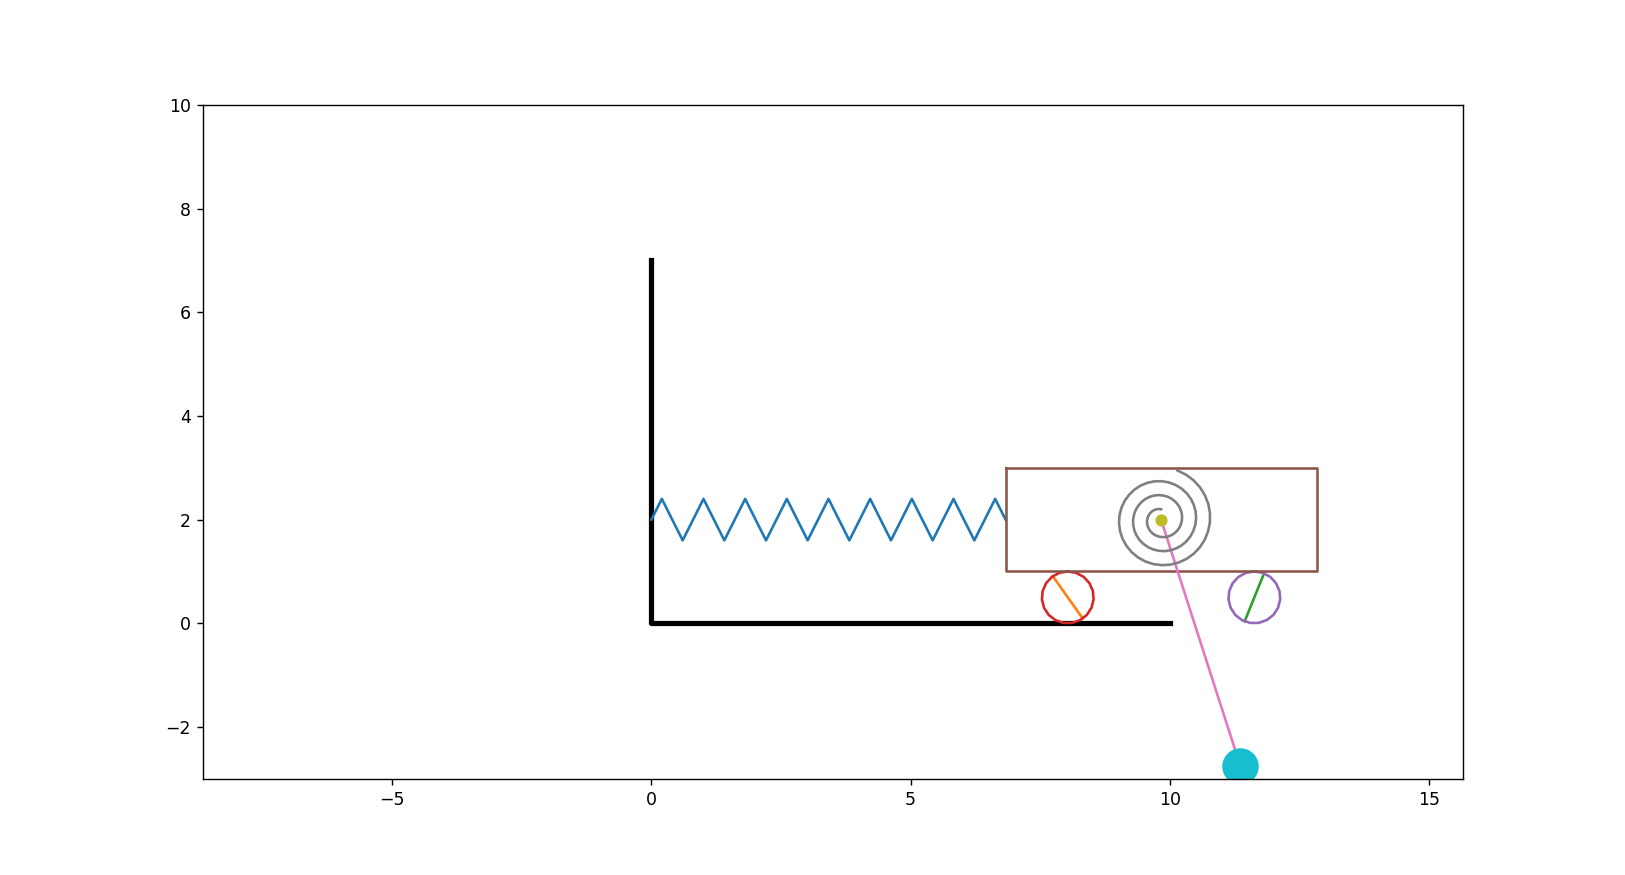

In [5]:
fig = plt.figure(figsize=[13,7])
ax = fig.add_subplot(1,1,1)
ax.axis('equal')
ax.set(xlim=[-3,10], ylim=[-3,10])

ax.plot(X_Ground,Y_Ground,color='black',linewidth=3)

Drawn_Spring = ax.plot(X_Spr*L_Spr[0], Y_A+Y_Spr)[0]

Drawn_WheelD1 = ax.plot([X_C1[0]+WheelR*np.sin(alpha[0]),X_C1[0]-WheelR*np.sin(alpha[0])],
                         [Y_C1+WheelR*np.cos(alpha[0]), Y_C1-WheelR*np.cos(alpha[0])])[0]
Drawn_WheelD2 = ax.plot([X_C2[0]+WheelR*np.sin(alpha[0]+1),X_C2[0]-WheelR*np.sin(alpha[0]+1)],
                         [Y_C2+WheelR*np.cos(alpha[0]+1), Y_C2-WheelR*np.cos(alpha[0]+1)])[0]

Drawn_Wheel1 = ax.plot(X_C1[0]+X_Wheel, Y_C1+Y_Wheel)[0]
Drawn_Wheel2 = ax.plot(X_C2[0]+X_Wheel, Y_C2+Y_Wheel)[0]
Drawn_Box = ax.plot(X_A[0]+X_Box, Y_A+Y_Box)[0]
Line_AB = ax.plot([X_A[0],X_B[0]], [Y_A,Y_B[0]])[0]
Drawn_SpiralSpring = ax.plot(X_SpiralSpr+X_A[0], Y_SpiralSpr+Y_A)[0]
Point_A = ax.plot(X_A[0], Y_A,marker='o')[0]
Point_B = ax.plot(X_B[0], Y_B[0],marker='o',markersize=20)[0]

def Kino(i):
    Point_A.set_data(X_A[i],Y_A)
    Point_B.set_data(X_B[i], Y_B[i])
    Line_AB.set_data([X_A[i],X_B[i]], [Y_A,Y_B[i]])
    Drawn_Box.set_data(X_A[i]+X_Box, Y_A+Y_Box)
    Drawn_Wheel1.set_data(X_C1[i]+X_Wheel, Y_C1+Y_Wheel)
    Drawn_Wheel2.set_data(X_C2[i]+X_Wheel, Y_C2+Y_Wheel)
    Drawn_Spring.set_data(X_Spr*L_Spr[i], Y_A+Y_Spr)

    Drawn_WheelD1.set_data([X_C1[i]+WheelR*np.sin(alpha[i]), X_C1[i]-WheelR*np.sin(alpha[i])],
                            [Y_C1+WheelR*np.cos(alpha[i]), Y_C1-WheelR*np.cos(alpha[i])])
    Drawn_WheelD2.set_data([X_C2[i] + WheelR * np.sin(alpha[i]+1), X_C2[i] - WheelR * np.sin(alpha[i]+1)],
                            [Y_C2 + WheelR * np.cos(alpha[i]+1), Y_C2 - WheelR * np.cos(alpha[i]+1)])

    thetta = np.linspace(0, Nv * 6.28 - phi[i], 100)
    X_SpiralSpr = -(R1 + thetta * (R2 - R1) / thetta[-1]) * np.sin(thetta)
    Y_SpiralSpr = (R1 + thetta * (R2 - R1) / thetta[-1]) * np.cos(thetta)
    Drawn_SpiralSpring.set_data(X_SpiralSpr+X_A[i], Y_SpiralSpr+Y_A)
    return [Point_A, Point_B, Line_AB, Drawn_Box, Drawn_Wheel1, Drawn_Wheel2,
            Drawn_Spring, Drawn_SpiralSpring, Drawn_WheelD1, Drawn_WheelD2]

anima = FuncAnimation(fig,Kino,frames=len(t),interval=10)

plt.show()